# Day 08. Exercise 05
# Clustering

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
#import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import datasets
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

Скачаем базу

In [3]:
df = pd.read_csv('../data/regression.csv')
df.head()

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,-64.400000
1,user_10,20,89.0,-74.800000
2,user_14,61,143.0,-159.000000
3,user_17,51,47.0,-61.600000
4,user_18,5,3.0,-5.666667


Удалим просмотры страниц, мы будем группировать пользователей только по количеству коммитов и их средней разнице.

In [4]:
df.drop('pageviews', axis=1, inplace=True)
df.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

Кластеризация: алгоритмы k-means и c-means теория: https://habr.com/ru/post/67078/
Метод выделения группы объектов, используя как меру расстояние. 
KMeans - наиболее простой, но не очень точный метод кластеризации в классической реализации. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k. Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров.
Нюансы:
* необходимо заранее знать количество кластеров
* алгоритм чувствителен к выбору начальных центров 
код:
https://habr.com/ru/company/otus/blog/666376/


In [5]:
kmeans = KMeans(n_clusters = 3, random_state = 21)

In [6]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['num_commits', 'AVG(diff)']])
df_scale = pd.DataFrame(scale, columns = ['num_commits', 'AVG(diff)']);
df_scale.head(5)

,num_commits,AVG(diff)
0,0.463415,0.718412
1,0.121951,0.671480
2,0.455285,0.291516
3,0.373984,0.731047
4,0.000000,0.983454


<AxesSubplot: title={'center': '8 clusters'}, xlabel='num_commits', ylabel='AVG(diff)'>

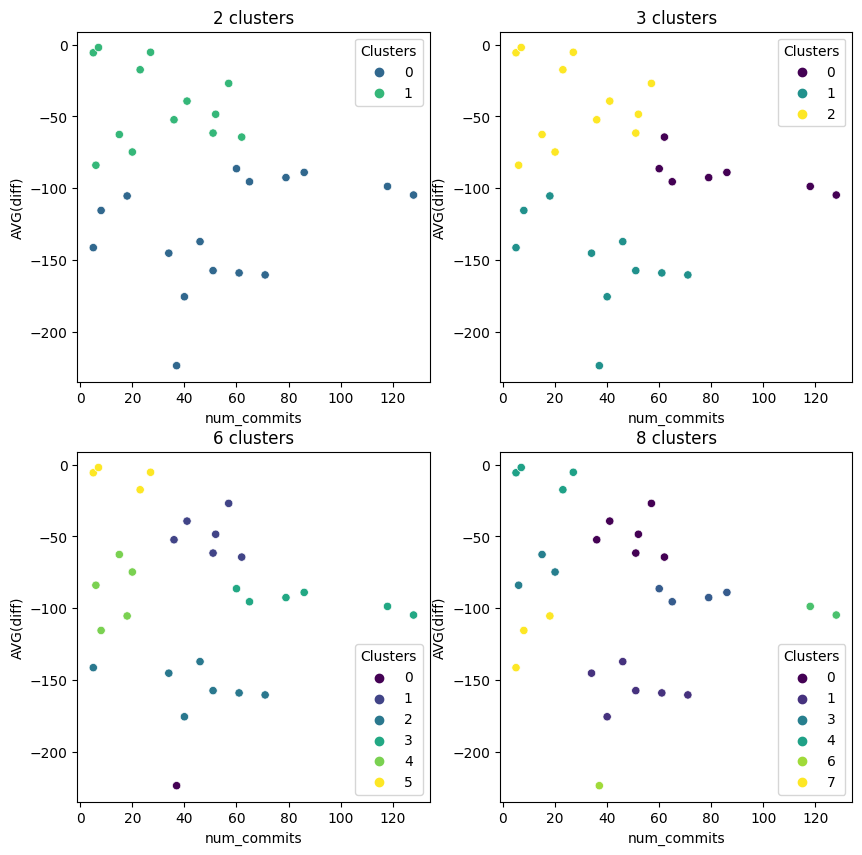

In [7]:
plt.figure(figsize=(10, 10))
ax=plt.subplot(2, 2, 1)
plt.title('2 clusters')
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['num_commits', 'AVG(diff)']])
km.cluster_centers_
df['Clusters'] = km.labels_
sns.scatterplot(x='num_commits', y='AVG(diff)',hue = 'Clusters',  data=df,palette='viridis')


plt.subplot(2, 2, 2)
plt.title('3 clusters')
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['num_commits', 'AVG(diff)']])
km.cluster_centers_
df['Clusters'] = km.labels_
sns.scatterplot(x='num_commits', y='AVG(diff)',hue = 'Clusters',  data=df,palette='viridis')

plt.subplot(2, 2, 3)
plt.title('6 clusters')
km2=KMeans(n_clusters=6)
y_predicted2 = km2.fit_predict(df[['num_commits', 'AVG(diff)']])
km2.cluster_centers_
df['Clusters'] = km2.labels_
sns.scatterplot(x='num_commits', y='AVG(diff)',hue = 'Clusters',  data=df,palette='viridis')

plt.subplot(2, 2, 4)
plt.title('8 clusters')
km=KMeans(n_clusters=8)
y_predicted = km.fit_predict(df[['num_commits', 'AVG(diff)']])
km.cluster_centers_
df['Clusters'] = km.labels_
sns.scatterplot(x='num_commits', y='AVG(diff)',hue = 'Clusters',  data=df,palette='viridis')

silhouette_score используется для определения дистанции между кластерами и выбора их оптимального количества. 
https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/

In [8]:
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,random_state=21).fit(df_scale).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(df_scale,labels,random_state=21)))


Silhouette score for k(clusters) = 2 is 0.37699460447176597
Silhouette score for k(clusters) = 3 is 0.38563916283105054
Silhouette score for k(clusters) = 4 is 0.41579158529054633
Silhouette score for k(clusters) = 5 is 0.48366282776732133
Silhouette score for k(clusters) = 6 is 0.49126115493145944
Silhouette score for k(clusters) = 7 is 0.4761309579638601
Silhouette score for k(clusters) = 8 is 0.4589230272290275
Silhouette score for k(clusters) = 9 is 0.45455133976377304


Мы видим, что метод metrics.silhouette_score показывает нам, что оптимальное количество кластеров - 6. Однако, разброс между показателями 5-9 не такой уж большой. Соответственно, мы можем принять оптимальным количество кластеров от 5 до 9. 

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

DBSCAN - Основанная на плотности пространственная кластеризация для приложений с шумами. Это алгоритм кластеризации, основанной на плотности — если дан набор точек в некотором пространстве, алгоритм группирует вместе точки, которые тесно расположены (точки со многими близкими соседями), помечая как выбросы точки, которые находятся одиноко в областях с малой плотностью (ближайшие соседи которых лежат далеко). DBSCAN является одним из наиболее часто используемых алгоритмов кластеризации, и наиболее часто упоминается в научной литературе.

Алгоритм работает путем вычисления расстояния между каждой точкой и всеми другими точками. Затем мы помещаем точки в одну из трех категорий.

Основная точка: точка, по крайней мере, сmin_samplesточки, расстояние которых относительно точки ниже порога, определенного эпсилоном.

Граница: точка, которая не находится в непосредственной близости, по крайней мере, отmin_samplesточки, но достаточно близко к одной или нескольким основным точкам. Границы включены в кластер ближайшей базовой точки.

Точка шума: точки, которые не достаточно близки к основным точкам, чтобы считаться пограничными точками. Шумовые точки игнорируются. То есть они не являются частью какого-либо кластера.
https://machinelearningmastery.ru/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc/

In [9]:
x = df_scale.loc[:, ['num_commits', 'AVG(diff)']].values # достаем нужные значения

In [10]:
print(x.shape)  #проверяем их количество

(29, 2)


In [11]:
db = DBSCAN(eps = 20, min_samples = 2).fit_predict(df_scale)  
# применяем алгоритм определения количества кластеров, 
#задаем мин количество значений в кластере (рекомендуется количество 2 * Data dimension, но у нас дано в сабдже)
#eps - расстояние до ближайшего соседа Nearest Neighbours
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 9
Estimated number of noise points: 0


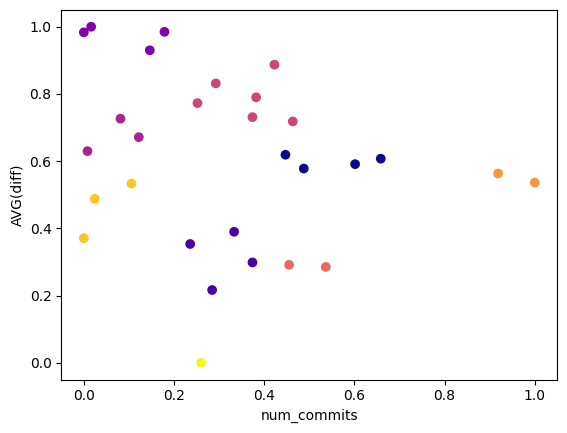

In [12]:
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("num_commits") # X-axis label
plt.ylabel("AVG(diff)") # Y-axis label
plt.show() # showing the plot

Calculate the average distance between each point in the data set and its 20 nearest neighbors 
(my selected MinPts value).
https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

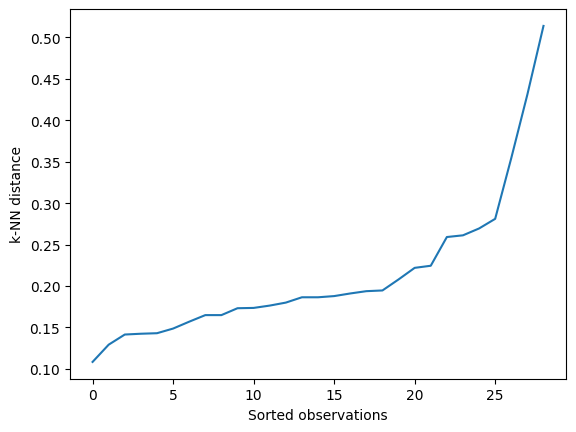

In [13]:
neighbors = NearestNeighbors(n_neighbors=5)
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=5).fit(df_scale)
neighbors_fit = neighbors.fit(df_scale)
distances, indices = neighbors_fit.kneighbors(df_scale)
#(kNN) distances - average distance of every data point to its k-nearest neighbors
distances = np.sort(distances, axis=0)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
distances = distances[:,4]
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations")
plt.plot(distances)

Пробуем с разными значениями

Estimated number of clusters: 9
Estimated number of noise points: 0


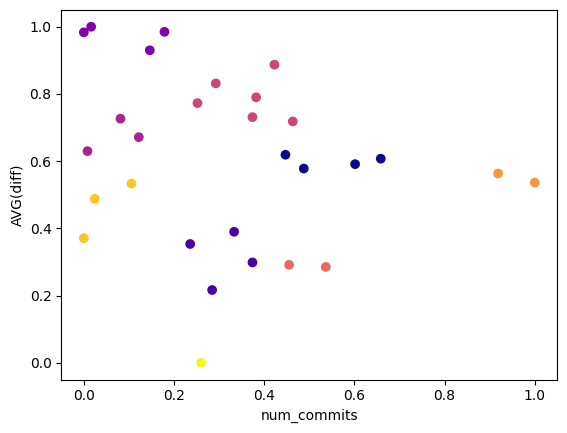

In [14]:
clusters = DBSCAN(eps = 22, min_samples = 4).fit(df_scale)
clusters.labels_
# применяем алгоритм определения количества кластеров, 
#задаем мин количество значений в кластере (рекомендуется количество 2 * Data dimension, но у нас дано в сабдже)
#eps - расстояние до ближайшего соседа Nearest Neighbours
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("num_commits") # X-axis label
plt.ylabel("AVG(diff)") # Y-axis label
plt.show() # showing the plot

In [15]:
print ("Silhouette score for 9 clusters is "+str(metrics.silhouette_score(df_scale,labels)))


Silhouette score for 9 clusters is 0.45455133976377304


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

Иерархическая кластеризация — это неконтролируемый метод обучения для кластеризации точек данных. Алгоритм строит кластеры, измеряя различия между данными. Неконтролируемое обучение означает, что модель не нужно обучать, и нам не нужна «целевая» переменная. Этот метод можно использовать для любых данных, чтобы визуализировать и интерпретировать взаимосвязь между отдельными точками данных.
https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp

In [16]:
data = df_scale

Используем алгоритм для создания кластеров с `n_clusters=5`.

Визуализируем данные на «диаграмме рассеивания».

Попробуем разные значения n_clusters и посмотрим, как изменится график.

Text(0.5, 1.0, '8 clusters')

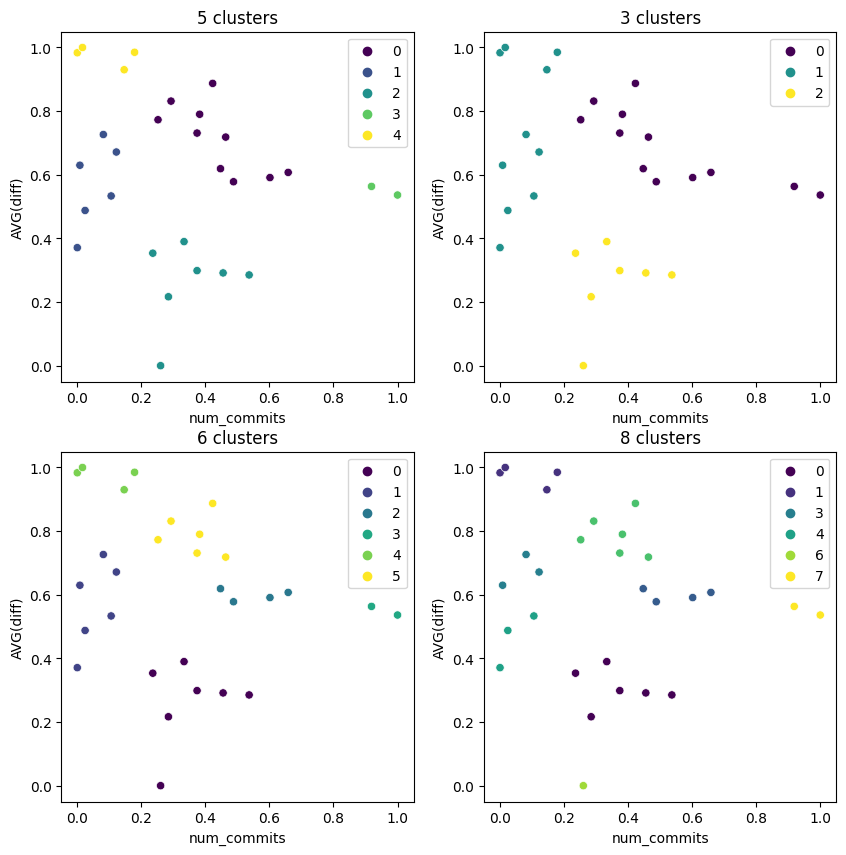

In [17]:
plt.figure(figsize=(10, 10))
ax=plt.subplot(2, 2, 1)
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
hierarchical_cluster.labels_
data_labels = hierarchical_cluster.labels_
sns.scatterplot(x='num_commits', 
                y='AVG(diff)', 
                data=data, 
                palette='viridis',
                hue=data_labels).set_title('5 clusters')

ax=plt.subplot(2, 2, 2)
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
hierarchical_cluster.labels_
data_labels = hierarchical_cluster.labels_
sns.scatterplot(x='num_commits', 
                y='AVG(diff)', 
                data=data, 
                palette='viridis',
                hue=data_labels).set_title('3 clusters')

ax=plt.subplot(2, 2, 3)
hierarchical_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
hierarchical_cluster.labels_
data_labels = hierarchical_cluster.labels_
sns.scatterplot(x='num_commits', 
                y='AVG(diff)', 
                data=data, 
                palette='viridis',
                hue=data_labels).set_title('6 clusters')

ax=plt.subplot(2, 2, 4)
hierarchical_cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
hierarchical_cluster.labels_
data_labels = hierarchical_cluster.labels_
sns.scatterplot(x='num_commits', 
                y='AVG(diff)', 
                data=data, 
                palette='viridis',
                hue=data_labels).set_title('8 clusters')

Рассчитаем `silhouette_score`.

In [18]:
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,random_state=21).fit(data).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(data,labels,random_state=21)))



Silhouette score for k(clusters) = 2 is 0.37699460447176597
Silhouette score for k(clusters) = 3 is 0.38563916283105054
Silhouette score for k(clusters) = 4 is 0.41579158529054633
Silhouette score for k(clusters) = 5 is 0.48366282776732133
Silhouette score for k(clusters) = 6 is 0.49126115493145944
Silhouette score for k(clusters) = 7 is 0.4761309579638601
Silhouette score for k(clusters) = 8 is 0.4589230272290275
Silhouette score for k(clusters) = 9 is 0.45455133976377304


Визуализируем «дендрограмму».

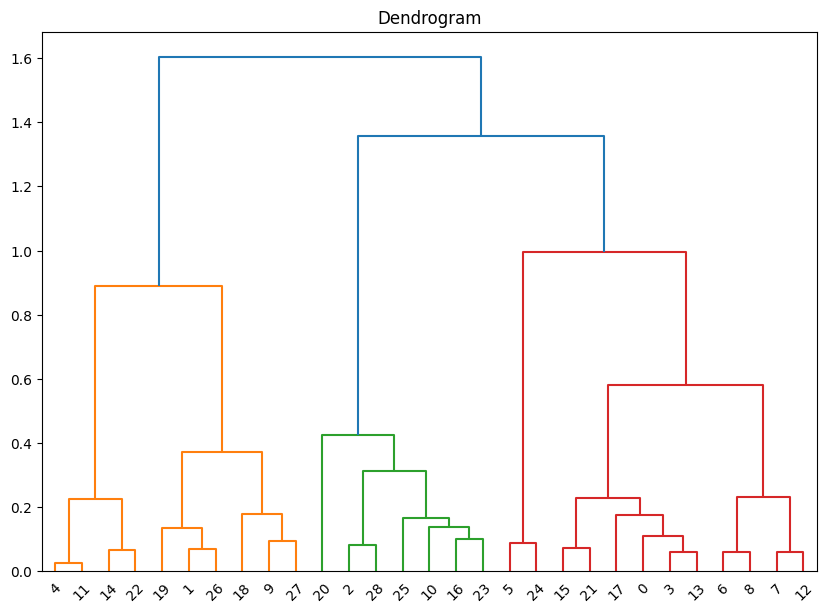

In [19]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
selected_data = data
clusters = shc.linkage(data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

Напишим функцию, которая:

1. Принимает в качестве аргументов: класс модели кластеризации, ее параметры, имя параметра для оптимизации, диапазон значений параметров, которые нужно попробовать.

2. Пробует разные значения из заданного диапазона параметров и вычисляет `silhouette_score` для каждого значения из диапазона.

3. Находит лучшее значение параметра в диапазоне.

4. Возвращает два подграфика:

-- первый показывает, как меняется `silhouette_score` в зависимости от значения параметра,
- - второй визуализирует данные на `графике рассеяния`, используя модель кластеризации с лучшим значением параметра.

Silhouette score for k(clusters) = 2 is 0.37699460447176597
Silhouette score for k(clusters) = 3 is 0.38563916283105054
Silhouette score for k(clusters) = 4 is 0.41579158529054633
Silhouette score for k(clusters) = 5 is 0.48366282776732133
Silhouette score for k(clusters) = 6 is 0.49126115493145944
Silhouette score for k(clusters) = 7 is 0.4761309579638601
The best value is 0.49126115493145944 for 6 clusters


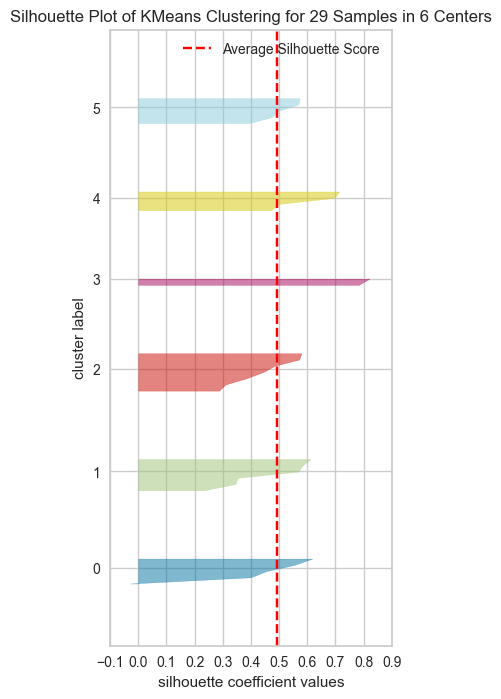

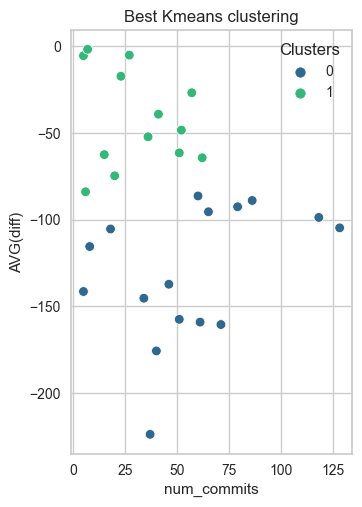

In [21]:
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_nfl

def my_function(clustering, clust_args, name, param_range):
    df_test = pd.read_csv('../data/regression.csv')
    df_test.drop('pageviews', axis=1, inplace=True)
    scaler = MinMaxScaler()
    scale = scaler.fit_transform(df[['num_commits', 'AVG(diff)']])
    df_test = pd.DataFrame(scale, columns = ['num_commits', 'AVG(diff)']);

    if clustering == 'kmeans':
        kmeans = KMeans(n_clusters = clusters, random_state = 21)
        labels=cluster.KMeans(n_clusters=param_range[0],random_state=21).fit(df_test).labels_
        best = metrics.silhouette_score(df_test, labels, metric='euclidean')
        best_num = param_range[0]
        for i in range(param_range[0],param_range[1]):
            labels=cluster.KMeans(n_clusters=i,random_state=21).fit(df_test).labels_
            print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(df_test,labels,random_state=21)))
            new = metrics.silhouette_score(df_test,labels,random_state=21)
            if  new > best:
                best = metrics.silhouette_score(df_test,labels,random_state=21)
                best_num = i
        print('The best value is', best, 'for', best_num, 'clusters')
        plt.figure(figsize=(8,8))
        ax=plt.subplot(1, 2, 1)    
        silhouette_visualizer(KMeans(n_clusters=6, random_state=21), df_test, colors='yellowbrick')
        
        ax=plt.subplot(1, 2, 2)   
        plt.title('Best Kmeans clustering')
        km=KMeans(n_clusters=2)
        y_predicted = km.fit_predict(df[['num_commits', 'AVG(diff)']])
        km.cluster_centers_
        df['Clusters'] = km.labels_
        sns.scatterplot(x='num_commits', y='AVG(diff)',hue = 'Clusters',  data=df,palette='viridis')
    

    
if __name__ == '__main__':
     my_function('kmeans', [2], clusters, [2,8])
       
    